# <font color='red'>Lab 04 - Flint Pb Analysis</font>

### EARTH 468: Data Analysis & Model Estimation

#### Lab developed by E.A. Hetland

#### Due by the beginning of the lab period for the week of October 13th, 2021 (2 weeks).

**For full credit:** 
Be sure to include your name with your notebook either as a markdown cell or in the file name. 

Write any necessary code in code cells below the description of each question. Write any discussion answers in markdown cells below the code cells, not as comments in your code. Be explicit about what you are answering and write in complete sentences. 

If you are asked to include a plot, make sure to label the axes and include a descriptive title.

To turn in this assignment, in the Jupyter toolbar select File/Download as/html or pdf. Make sure that all of your outputs are clear. Upload the downloaded file to the proper assignment submission page on Canvas. Please do not turn in a .ipynb file.

**Objective:** This lab explores the ramifications of treating data as either the values or logarithm of the
values in terms of the distribution of the data and ramifications on identification of outliers.

**Python Objective:** Gain further experience thinking pythonically about challenging problems; while loop & querying a data array.

**Data:** In this lab we will be using lead (Pb) concentration measurements from a Virginia Tech analysis of
household water taps (data from http://flintwaterstudy.org/, accessed June 2016). Specifically,
we will use measurements for which there were three samples taken: the first at the initial draw of
the tap, the second after 45 seconds of flushing the tap, and after 2 minutes of flushing. For this problem,
please use the data in *FlintPb_VirginiaTech.csv* to ensure we all use the same data (to ease in grading, etc). Each row of the data file corresponds to a single tap in a private home.


# <font color='orange'>Excercise - 40 pts</font>

The data file Lab04_FlintPb_VirginiaTech.csv contains the Pb concentration (in units of ppb)
for samples taken from 271 testing locations (each location includes three samples).

<img src="Data_viz_1.png">

In general, the Pb concentration decreases as the tap is flushed, so the concentration of Pb after 45 seconds
of flushing generally should be lower than at first draw, and at 2 minutes of flushing should be even lower.
This can be seen in the above plot, where each point represents the Pb after flushing vs. the first draw, and the points generally fall below the 1:1 line in a log-log space. Additionally, the blue points, Pb at the 2 minute flush, are generally lower than the corresponding red points, Pb at the 45 second flush.
The Pb concentration over the three draws for 30 of the samples with the highest Pb concentrations are
shown below, where you can see that in the majority of the samples, Pb decreases in later sample draws.
The below plot shows the Pb concentration either at the first draw (draw #1), 45 seconds of flushing (draw
#2), or 2 minutes of flushing (draw #3).

<img src="Data_viz_2.png">

# <font color='red'> Import Libraries: </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## <font color='red'>a) 6 pts</font>

As a first step to explore the data, calculate the highest Pb concentration for each sample (in most cases
this will be the first flush, but not in all cases). Plot a histogram of both Pb$_{max}$ and Log$_{10}$[Pb$_{max}$]. <b> Describe whether you think these histograms reveal any outliers. </b> 
    Label and title your histograms for full credit.

In [6]:
df = pd.read_csv('FlintPb_VirginiaTech.csv')
Pb_data = np.array(df) # convert data frame to an array

Pb_max = np.max(Pb_data,axis=1) # pick out largest value from each row
log10_Pb_max = np.log10(Pb_max) # log10 of Pb_max

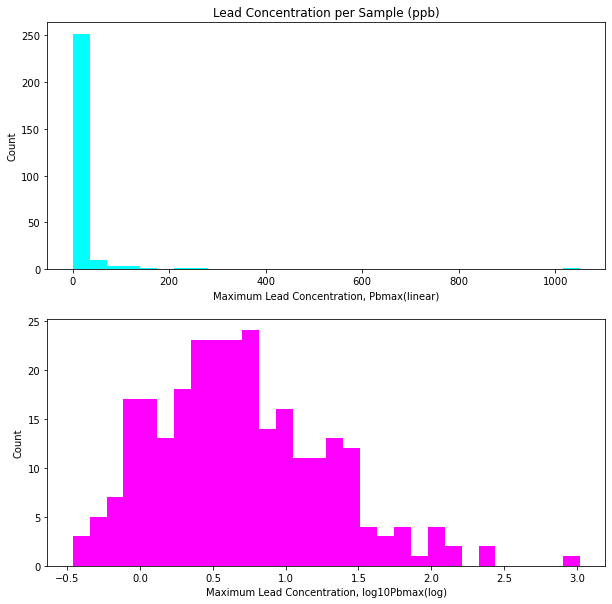

In [11]:
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(Pb_max,bins=30,color='cyan')
ax2.hist(log10_Pb_max,bins=30,color='magenta')

ax1.set_xlabel('Maximum Lead Concentration, Pbmax(linear)')
ax1.set_ylabel('Count')
ax2.set_xlabel('Maximum Lead Concentration, log10Pbmax(log)')
ax2.set_ylabel('Count')

ax1.set_title('Lead Concentration per Sample (ppb)')
plt.show()

I think the first histogram (the linear one) reveals what looks like an outlier near 1000. The second histogram (the log one) possibly is revealing an outlier near 3.0, but it isn't obvious enough to be sure yet.

## <font color='red'>b) 8 pts</font>

To characterize the distribution for the measurements, produce normal probability plots of both Pb$_{max}$ and
Log$_{10}$[Pb$_{max}$]. First, find the normalized anomaly of both Pb$_{max}$ and Log$_{10}$[Pb$_{max}$]. To do this, use the following formula:

<font size='4'>$x'_i=\frac{x_i-\bar{x}}{\sigma_x}$</font>

where $x'_i$ is the normalized anomaly, $x_i$ is the observed value, $\bar{x}$ is the mean of $x$, and $\sigma_x$ is the standard deviation of $x$. Then, use your newly computed standardized anomalies with the function *scipy.stats.probplot*. Look up the documentation on this function to learn more about how it is used. Make both the x-axis and y-axis of both plots go from -3 to 3. Also plot the identity line on both of your plots (the identity line is y=x). 

<b> What do the normal probability plots (you should have two, one for the linear scale Pb data, and one for the log-scale Pb data) tell you about the statistical distribution of the data? </b>

In [15]:
def stand_anomaly(data):
    s_a = (data - np.mean(data))/np.std(data,ddof=1)
    return s_a

Pb_max_sa = stand_anomaly(Pb_max)
log10_Pb_max_sa = stand_anomaly(log10_Pb_max)

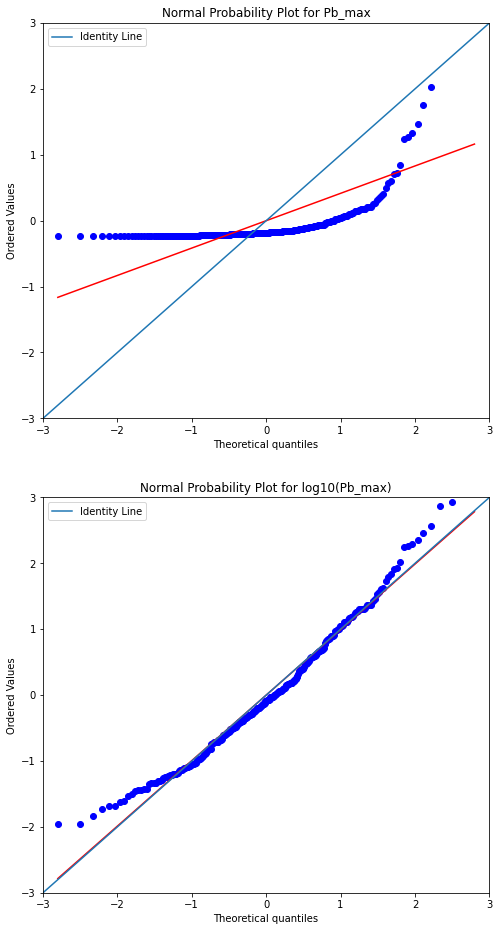

In [17]:
from scipy.stats import probplot

fig = plt.figure(figsize=[8,16])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_xlim(-3,3) # set axis limits from -3 to 3 for standardized data
ax2.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax2.set_ylim(-3,3)

prob_pb = probplot(Pb_max_sa,dist='norm',plot=ax1)
prob_log10_pb = probplot(log10_Pb_max_sa,dist='norm',plot=ax2)

xy = np.arange(-3,4)
ax1.plot(xy,xy,label='Identity Line')
ax2.plot(xy,xy,label='Identity Line')

ax1.set_title('Normal Probability Plot for Pb_max')
ax2.set_title('Normal Probability Plot for log10(Pb_max)')

ax1.legend()
ax2.legend()

plt.show()

The normal probability plots tell us how far the statistical distribution of the data is from a normal Gaussian distribution. Our max lead concentrations (Pb_max) are not normally distributed, since the data does not follow that identity line at all. Our log10 lead concentrations (log10_Pb_max) does look like a normal distribution for the most part (though there is some peeling up at the ends).

## <font color='red'>c) 10 pts</font>

We will now apply a Grubb’s test to identify and remove outliers. 

Grubb’s test states that an extreme value
is an outlier if the the so-called G-statistic is larger than some critical value:

<font size='4'>$G=\frac{|x_i-\bar{x}|}{\sigma_x}>G_{crit}$</font>

where $\bar{x}$ and $\sigma_x$ are the sample mean and standard deviation, respectively. $G_{crit}$ depends on the number of data in the set, as well as a so-called confidence interval. Leaving the details of the underlying mechanics of the test for lecture, we will use pre-computed $G_{crit}$ values found in the file *GrubbsCritcalValues995.csv* (calculated at the 99.5% confidence).
Test the largest $Pb_{max}$ against the appropriate $G_{crit}$ to see if it is an outlier. If it is, remove it, and then test the next largest $Pb_{max}$. Continue reducing the size of the data for all of the extreme values that fail the Grubb’s test for outliers. Remember to update $G_{crit}$ based on the number of data in the reduced data set, and use $x$ and $\sigma_x$ calculated on that reduced data set. 

(*Hint: It can be helpful to write down the different steps required to solve this problem before you begin developing code.*)

<b> How many of the extreme values were identified as outliers using Grubb’s test? What is the largest $Pb_{max}$ after removing all the suspected outliers? </b>

In [27]:
# Goal: We want to use Grubbs test to remove all of the suspected outliers
# 1st step: Read in the Gcritical values from csv

df_crit = pd.read_csv('GrubbsCritcalValues995.csv')
Gcrit_array = np.array(df_crit) #[:,0] - number of samples; [:,1] - G-critical values

# 2nd step: Perform Grubbs test on the largest value in our data array by calculating G test statistic

def G_test_statistic(data):
    G = np.abs(np.max(data) - np.mean(data))/np.std(data,ddof=1)
    return G

print(G_test_statistic(Pb_max))

# 3rd step: Compare G-test statistic to G-critical value that corresponds to number of data points

np.shape(Pb_max)[0] # number of elements in Pb_max
G_crit_index = np.shape(Pb_max)[0] - 100
Gcrit_array[G_crit_index]

# 4th step: If Gstatistic > Gcrit, remove the largest value from Pbmax and repeat steps 2-4 by while loop

G_test_statistic(Pb_max) > Gcrit_array[G_crit_index][1] # returns true, so signals an outlier
Pb_max_updated = Pb_max.tolist()
print(len(Pb_max_updated)) # checks length of the list
Pb_max_updated.remove(np.max(Pb_max_updated))
print(len(Pb_max_updated)) # now that largest value is gone

14.889154636895602
271
270


In [28]:
# Now it will run until there are no more outliers

Pb_max_updated = Pb_max.tolist()
while G_test_statistic(Pb_max_updated) > Gcrit_array[G_crit_index][1]:
    Pb_max_updated.remove(np.max(Pb_max_updated))
    G_crit_index = len(Pb_max_updated) - 100

print('number of outliers discarded by Grubbs test: ', Pb_max.shape[0] - len(Pb_max_updated))
print('maximum remaining concentration: ', np.max(Pb_max_updated))

number of outliers discarded by Grubbs test:  17
maximum remaining concentration:  40.63


## <font color='red'>d) 10 pts</font>

Repeat Grubb's test for the lead data in log-10 space.

Test the largest Log$_{10}$[Pb$_{max}$] against the appropriate G$_{crit}$ to see if it is an outlier. If it is, remove it, and then test the next largest Log$_{10}$[Pb$_{max}$]. Continue reducing the size of the data for all of the extreme values that fail the Grubb’s test for outliers. Remember to update G$_{crit}$ based on the number of data in the reduced data set, and use $x$ and $\sigma_x$ calculated on that reduced data set. 

<b> How many of the extreme values were identified as outliers using Grubb’s test? What is the largest Pbmax after removing all the suspected outliers in the log-10 space? </b>

In [32]:
log10_Pb_max_updated = log10_Pb_max.tolist()
while G_test_statistic(log10_Pb_max_updated) > Gcrit_array[G_crit_index][1]:
    log10_Pb_max_updated.remove(np.max(log10_Pb_max_updated))
    G_crit_index = len(log10_Pb_max_updated) - 100

print('number of outliers discarded by Grubbs test: ', log10_Pb_max.shape[0] - len(log10_Pb_max_updated))
print('maximum remaining concentration: ', np.max(log10_Pb_max_updated))

number of outliers discarded by Grubbs test:  0
maximum remaining concentration:  3.021602716028242


## <font color='red'>e) 6 pts</font>

A necessary condition for the Grubb’s test to be applied is that the data is Gaussian distributed. <b> Based on
the normal probability plots of Pb$_{max}$ vs. Log$_{10}$[Pb$_{max}$], remark on whether the Grubb’s test is applicable for either Pb$_{max}$ or Log$_{10}$[Pb$_{max}$]. What does this indicate about the suspected outliers? </b>

Based on the normal probability plots of Pb_max vs. log10_Pb_max, I don't believe the Grubb's test is applicable for the Pb_max data because that data is not Gaussian, or normally distributed. The null hypothesis for a Grubb's test assumes the data is Gaussian, and if the data isn't Gaussian then there's no way to know if you're rejecting the null hypothesis because there is an outlier or because the data is not normal. So, since the Grubb's test is not applicable for Pb_max, we do not know if the suspected outliers are actual outliers or not. As for the log10_Pb_max probability plot, that data does look pretty Gaussian so I do think the Grubb's test is applicable here. Therefore, tis indicates that the 0 suspected outliers is likely accurate. Furthermore, look at how your data is represented, for some problems it makes sense to leave the data as is, but for other situations it makes more sense to do a logarithm of the data instead.